## This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.


### TASK : To develop a model that can classify mushrooms as edible("e") or poisonus("p")  using the set of physical attribute provided the dataset
###  Dataset : traning datset(train.csv) : contains features along with the target variable ,indiacating whether each mushrooms is edible or poisonis  .Test dataset (test.csv). contains the fature but requires predictions forwhether the mushrooms are edible or poisonouse 
### Evaluation : the performance of themodel is evaluated using the mattews correlations coeeficiatn(MCC) a metric that balance truw and falseposistive and negaitives , providing a measure of the quality of binary classification

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score,accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
data=pd.read_csv("mushrooms.csv")

# EDA  AND DATA-PREPROCESSING 

In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [5]:
data.shape

(8124, 23)

In [6]:
data.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [8]:
# now check the every columns have the object values 

for col in data.columns:
    print(f"{col}  have unique values {data[col].unique()}")

class  have unique values ['p' 'e']
cap-shape  have unique values ['x' 'b' 's' 'f' 'k' 'c']
cap-surface  have unique values ['s' 'y' 'f' 'g']
cap-color  have unique values ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises  have unique values ['t' 'f']
odor  have unique values ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment  have unique values ['f' 'a']
gill-spacing  have unique values ['c' 'w']
gill-size  have unique values ['n' 'b']
gill-color  have unique values ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape  have unique values ['e' 't']
stalk-root  have unique values ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring  have unique values ['s' 'f' 'k' 'y']
stalk-surface-below-ring  have unique values ['s' 'f' 'y' 'k']
stalk-color-above-ring  have unique values ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring  have unique values ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type  have unique values ['p']
veil-color  have unique values ['w' 'n' 'o' 'y']
ring-nu

In [9]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

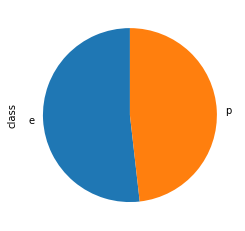

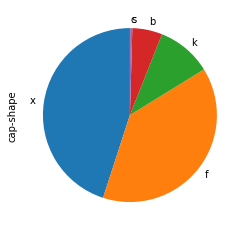

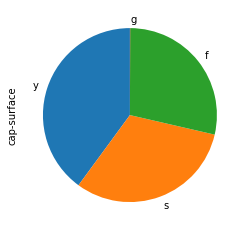

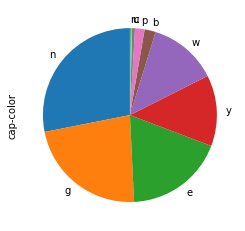

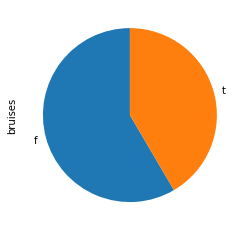

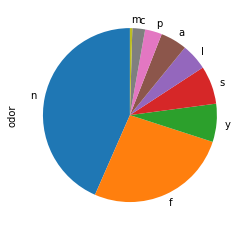

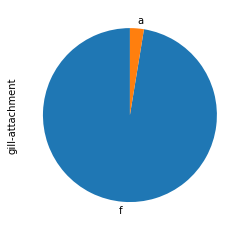

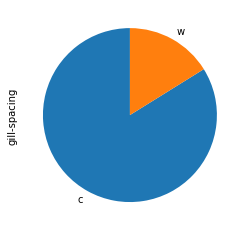

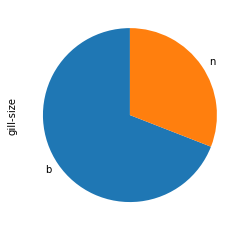

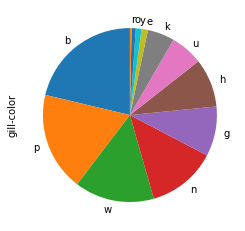

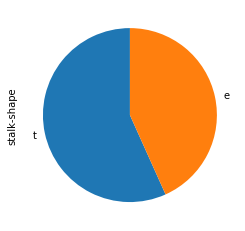

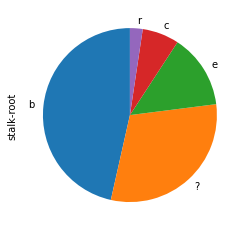

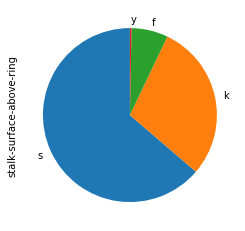

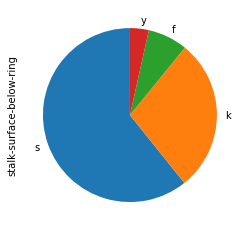

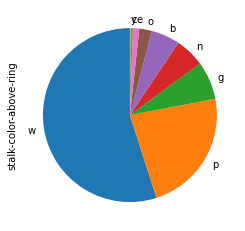

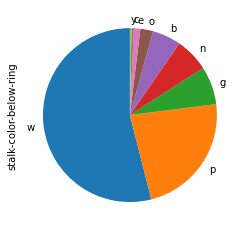

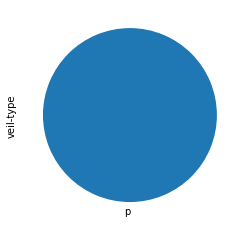

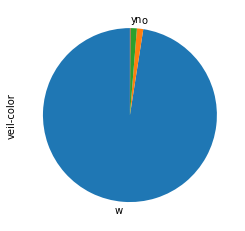

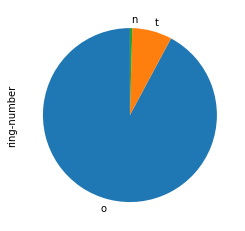

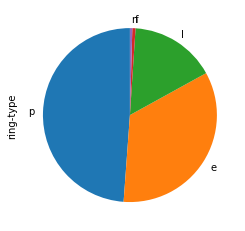

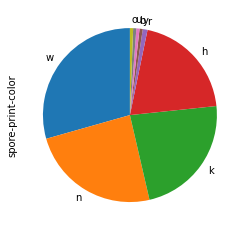

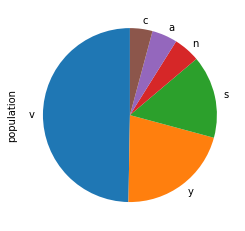

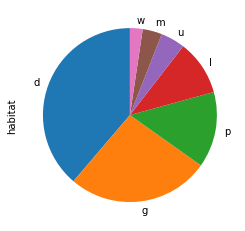

In [10]:
#Exploratory data Analysis
# byusing the seaborn and matploTLIB


for col in data.columns:
    data_count=data[col].value_counts()
    
    data_count.plot.pie(startangle=90)
    
    plt.show()



#### By using the pie chart we can easily say that there are many columns who have dominant values in each columns 
# Feature engineering 

In [11]:
le=LabelEncoder()

for col in data.columns:
    data[col]=le.fit_transform(data[col])

In [12]:
X=data.drop(columns='class',axis=1)
Y=data["class"]

In [13]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [14]:
Y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

In [15]:
# model building 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8,random_state=42)

In [16]:
x_train.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7873,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
6515,5,2,4,0,2,1,0,1,0,1,...,2,7,7,0,2,1,0,7,4,4
6141,2,3,2,0,8,1,0,1,0,1,...,2,6,7,0,2,1,0,7,4,2
2764,2,0,4,1,5,1,0,0,9,1,...,2,3,6,0,2,1,4,3,4,0
438,0,3,9,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,3


In [19]:
# model selection


# for the classifier we have a differnt machine learning algorithm to use like random forest ,decision tree ,logistic classifier and more
# but we are goinf to  perform model selection on this 3 


models={
    "RandomForestClassifier":RandomForestClassifier(random_state=42,n_estimators=100),
    "LogisticRegression":LogisticRegression(max_iter=1000,random_state=42),
    "Decision_tree":DecisionTreeClassifier(),
    "k-Nearest Neighbour":KNeighborsClassifier(n_neighbors=5),
    "gradient Boosting":GradientBoostingClassifier(n_estimators=100,random_state=42),
}


result=[]


for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred,average="weighted")
    result.append({"Model":name,"Accuracy":acc,"F1-Score":f1})
    
    #creating the dataframe ofr comparison
result_df=pd.DataFrame(result).sort_values(by="Accuracy",ascending=False)
    
    
print(result_df)

                    Model  Accuracy  F1-Score
0  RandomForestClassifier  1.000000  1.000000
2           Decision_tree  1.000000  1.000000
4       gradient Boosting  1.000000  1.000000
3     k-Nearest Neighbour  0.996308  0.996308
1      LogisticRegression  0.947692  0.947696


In [20]:
# logistic regression performing well as compare to  ranf=dom forest ,decision ,gradient they overfiting model and k nearest neighbout is also nearest to the overfitiing mode 
